<a href="https://colab.research.google.com/github/Ronan280214/belajar/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [7]:
#load data dari internet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
#memisahkan target variable (quality) dari predictor variable
X = df.drop('quality', 1) 

In [10]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
#untuk mendapatkan nilainya saja dan menjadikannya feature matrix (predictor variable)
X = X.values 
X 

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [12]:
# target variable
y1 = df['quality'].values
y1 

array([5, 5, 5, ..., 6, 5, 6])

In [13]:
X.shape

(1599, 11)

In [16]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [15]:
#split data menjadi training set dan testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train

array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
       [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
       [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]])

In [18]:
X_train.shape

(1279, 11)

In [19]:
X_test.shape

(320, 11)

In [20]:
#Lakukan proses training
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #kita dapat mencoba untuk k=3,5,7...
knn_model_1 = knn.fit(X_train, y_train)

In [21]:
knn_model_1

KNeighborsClassifier(n_neighbors=3)

In [22]:
#lakukan proses testing/predicting terhadap knn_model_1 dan cek akurasinya
knn_result_1 = knn_model_1.score(X_test, y_test)
print('k-NN accuracy for test set: %f' %knn_result_1)

k-NN accuracy for test set: 0.453125


In [23]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))
"precision : tp/(tp+fp)"
"recall : tp/(tp+fn)"
"fi-score : (2xprecisionxrecall)/(precision+recall)"

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.10      0.08        10
           5       0.53      0.62      0.57       130
           6       0.43      0.39      0.41       132
           7       0.40      0.29      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.45       320
   macro avg       0.24      0.23      0.23       320
weighted avg       0.45      0.45      0.45       320



'fi-score : (2xprecisionxrecall)/(precision+recall)'

In [24]:
from sklearn.metrics import confusion_matrix
#cara bacanya: row/label kiri adalah actual, kolom/label atas adalah predictor
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  2,  7,  0,  0],
       [ 1,  4, 81, 40,  3,  1],
       [ 0, 11, 57, 51, 13,  0],
       [ 0,  0, 10, 18, 12,  2],
       [ 0,  0,  1,  2,  2,  0]])

In [31]:
#coba dengan k=7
from sklearn import neighbors
knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7) #kita dapat mencoba untuk k=3,5,7...
knn_model_1_k7 = knn_7.fit(X_train, y_train)
knn_result_1_k7 = knn_model_1_k7.score(X_test, y_test)
print('k-NN accuracy for test set: %f' %knn_result_1_k7)

k-NN accuracy for test set: 0.462500


In [32]:
#coba dengan k=11
from sklearn import neighbors
knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11) #kita dapat mencoba untuk k=3,5,7...
knn_model_1_k11 = knn_11.fit(X_train, y_train)
knn_result_1_k11 = knn_model_1_k11.score(X_test, y_test)
print('k-NN accuracy for test set: %f' %knn_result_1_k11)

k-NN accuracy for test set: 0.475000


In [33]:
#coba dengan k=15
from sklearn import neighbors
knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15) #kita dapat mencoba untuk k=3,5,7...
knn_model_1_k15 = knn_15.fit(X_train, y_train)
knn_result_1_k15 = knn_model_1_k15.score(X_test, y_test)
print('k-NN accuracy for test set: %f' %knn_result_1_k15)

k-NN accuracy for test set: 0.459375


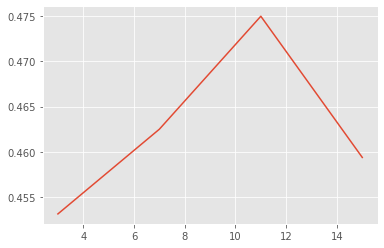

In [35]:
plt.plot([3,7,11,15], [knn_result_1, knn_result_1_k7, knn_result_1_k11, knn_result_1_k15])